<font face='monospace'>Code to draw a Polar bear using mathematical functions</font>

In [14]:
import math
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'monospace'
plt.rcParams["font.style"] = 'normal'
plt.rcParams["font.weight"] = 'bold'

In [15]:
# Part A constant
PART_A = -7 / 20

# Define each part of the function
@jit
def part_b(x, y):
    term1 = 175 * (x - 0.63)**2
    term2 = 3500 * math.pow(abs(y - 0.1), (2.6 - 0.6 * x))
    term3 = 160 * math.sin(x + 0.4)**8
    term4 = 50 * math.sin(x + 0.8)**100
    return -1 * (1 / math.pi) * math.atan(term1 + term2 + term3 - term4 - 500)

@jit
def part_c(x, y):
    term1 = (x - 7/4)**2
    term2 = (y - 33/200)**2
    return -1 * math.exp(-2000 * (term1 + term2 - 0.001))

@jit
def part_d(x, y):
    return -1 * math.exp(1000 * (x - (0.4 * y) - 2.15))

@jit
def part_e_power(y):
    exp_input = 1000 * (-0.25 + (y + 0.5)**2)
    exp_input = min(max(exp_input, -700), 700)  # Cap to avoid overflow
    return -1 * math.exp(exp_input)

@jit
def part_e(x, y):
    result = 0
    for i in range(1, 5):
        offset = 0.1 + y**2
        cos_term = (math.cos(y + 0.7))**20
        factor = part_e_power(y) - 300 * offset * ((x - 0.5 * i + 1.3 + (0.09 + 0.23 * ((-1)**i)) * (y + 0.4) + 0.1 * cos_term)**2)
        factor = min(max(factor, -700), 700)  # Cap to avoid overflow
        result += math.exp(factor)
    return result * 10

# Combined function
@jit
def f(x, y):
    return PART_A + part_b(x, y) + part_c(x, y) + part_d(x, y) + part_e(x, y)

In [16]:
f(2, 3)  # run once so that the code gets compiled

-0.8499792962022982

In [17]:
# Generate x and y values for sampling
x_vals = np.linspace(-5, 5, 5000)
y_vals = np.linspace(-5, 5, 5000)

# Collect points where full_equation > 0
points = []
for x in x_vals:
    for y in y_vals:
        try:
            if f(x, y) > 0:
                points.append((x, y))
        except OverflowError:
            pass  # Skip values that cause overflow

# Separate x and y coordinates for plotting
x_points, y_points = zip(*points)

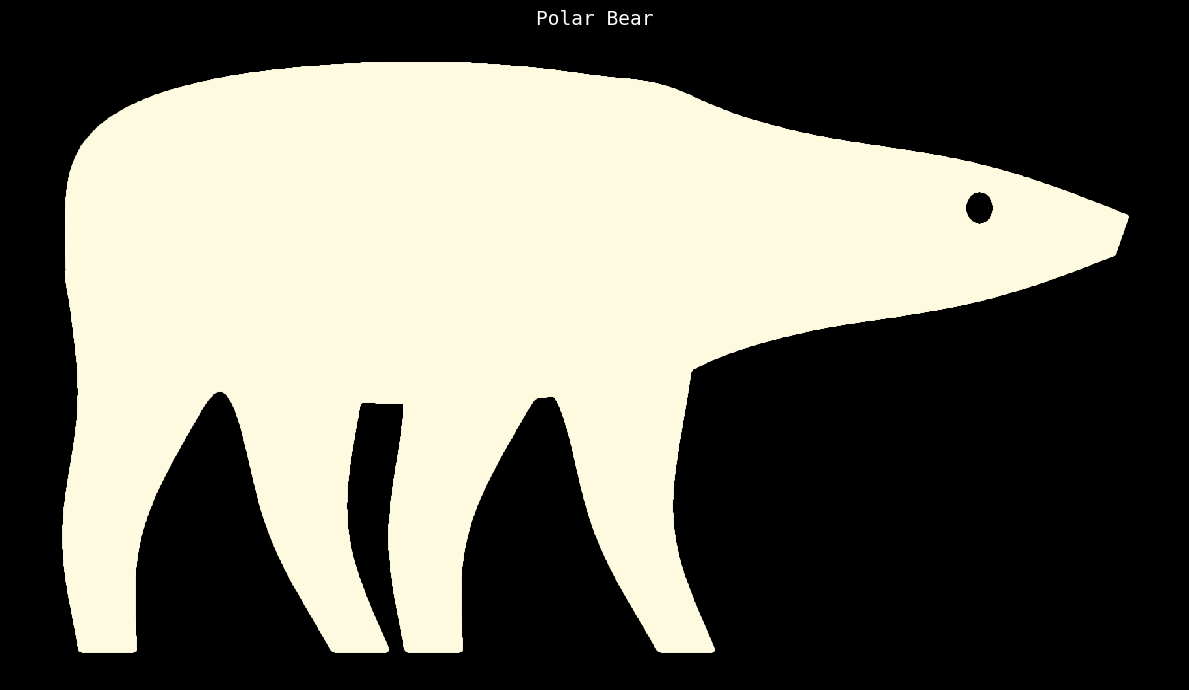

In [22]:
# Plot settings
plt.figure(figsize=(12, 7), facecolor='black')
plt.scatter(x_points, y_points, s=0.9, color='#fefae0', marker="8")  # Warm white color

# Add title with specified font
plt.title("Polar Bear", color='white', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()